In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

Informações fornecidas no enunciado do projeto


In [15]:
l = 0.1 # lado
d = 0.001 #distancia entre as placas
v0 = 1 # potencial em z = d
e0 = 8.85*10**-12
n = 10 #quantidade de segmentos
delta = l/n

Agora o cálculo dos elementos da matriz de coordenadas do centro de cada elemento (x, y, z), onde: 

rn = (xi, yj, zk) com i = [1..n], j = [1..n] e k = 1 (placa de baixo) ou 0 (placa de cima)
xi = (i - 1/2)delta, yj = (j - 1/2)delta, zk = dk


1.   Item da lista
2.   Item da lista



In [18]:
def matriz_coordenadas(n):
  matriz = []
  for k in range (0, 2):
    for j in range (1, n+1):
      for i in range (1, n+1):
        matriz.append([i*delta - delta/2, j*delta - delta/2, d*k])

  return matriz

matriz_c = matriz_coordenadas(n)

# 1) Determine as expressões para os elementos das matrizes de impedância e de tensão do método dos momentos em função de N.

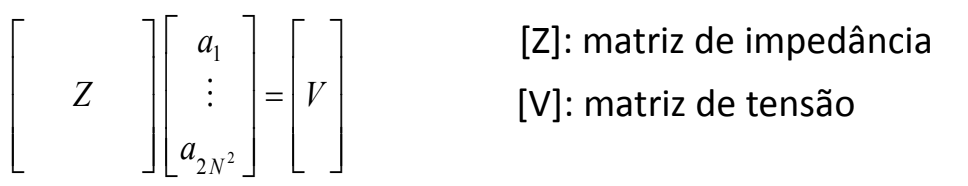

Vamos primeiro calcular a matriz de impedância Z, onde Zmn é igual ao potencial no ponto  erado por uma densidade superficial de carga constante e igual a 1 no 
sub-domínio n.

-> Se m != n: Zmn pode ser aproximado como se toda a carga do quadrado n estivesse concentrada no centro

-> Se m == n: i = p, j = q, k = s, xi = xp, yj = yq, zk = zs


In [20]:
def matriz_impedancia(n, matriz_coordenadas):
  Z = []
  for i in range(0, 2*n*n):
    Z.append([])
    for j in range(0, 2*n*n):
      element = 0
      if (i!=j):
        element = 1/(4*3.14*e0)*pow(delta,2)/math.sqrt(pow(matriz_coordenadas[i][0] - matriz_coordenadas[j][0], 2) + pow(matriz_coordenadas[i][1] - matriz_coordenadas[j][1], 2) + pow(matriz_coordenadas[i][2] - matriz_coordenadas[j][2], 2))
      else:
        element = delta/(3.14*e0)*math.log(1+math.sqrt(2))
      Z[i].append(element)
  
  return Z

matriz_z = matriz_impedancia(n, matriz_c)


Para calcular a matriz de tensão seguiremos a seguinte regra:     
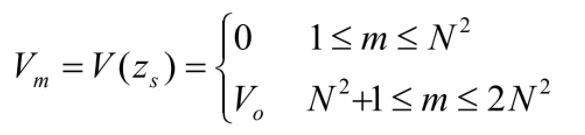

In [21]:
def matriz_tensao(n):
  V = []
  for i in range(0, 2*n*n):
      if (i<n*n):
        V.append(0)
      else: 
        V.append(v0)

  return V

matriz_v = matriz_tensao(n)

# 2) Para o caso em que L = 10 cm, d = 1 mm, e V0 = 1 V, resolva o sistema linear para um valor de N específico (você escolhe). Determine as amplitudes dos pulsos, e obtenha uma aproximação para a  distribuição de carga superficial na placa. Plote o resultado.

In [ ]:
def amplitude(Z, V):
  return np.linalg.solve(Z, V)

matriz_a = amplitude(matriz_z, matriz_v)
print(A)

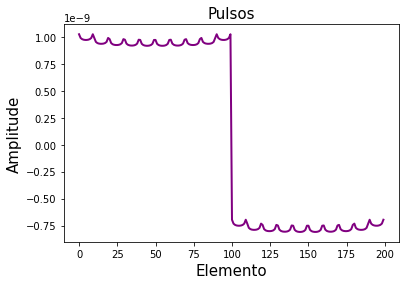

In [42]:
def amplitude_plot(amplitude):
  plt.title('Pulsos', fontsize=15)
  plt.xlabel('Elemento', fontsize=15) 
  plt.ylabel('Amplitude', fontsize=15)
  plt.plot(amplitude, color='purple', linewidth='2')
  plt.show()

amplitude_plot(matriz_a)

In [26]:
def distribuicao_superficial(amplitude):
  return sum(amplitude)

rho = distribuicao_superficial(A)
print(rho)

1.752928493169304e-08


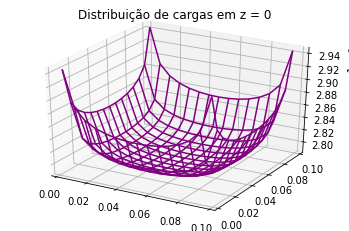

In [78]:
# z == 0
def distribuicao_plot(r, a, n):
  R = np.array(r)
  X = np.reshape(R[:len(R)//2, 0], (n, n))
  Y = np.reshape(R[:len(R)//2, 1], (n, n))
  Z = np.reshape(np.array(a[:len(a)//2]), (n, n))

  graph = plt.axes(projection = '3d')
  graph.plot_wireframe(X, Y, Z, color='purple')
  graph.set_title("Distribuição de cargas em z = 0")
  plt.show()

distribuicao_plot(matriz_c, matriz_a, n)


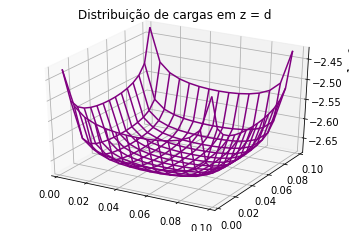

In [75]:
# z == d
def distribuicao_plot2(r, a, n):
  R = np.array(r)
  X = np.reshape((R[:len(R)//2, 0]), (n, n))
  Y = np.reshape((R[:len(R)//2, 1]), (n, n))
  Z = np.reshape((np.array(a[len(a)//2:len(a)])), (n, n))

  graph = plt.axes(projection = '3d')
  graph.plot_wireframe(X, Y, Z, color='purple')
  graph.set_title("Distribuição de cargas em z = d")
  plt.show()

distribuicao_plot2(matriz_c, matriz_a, n)


# 3) Resolva o problema e plote a distribuição superficial de carga para diferentes valores de N. Comente os resultados.

Aumentando N conseguimos notar que a carga começa a se acumular nas bordas da placa

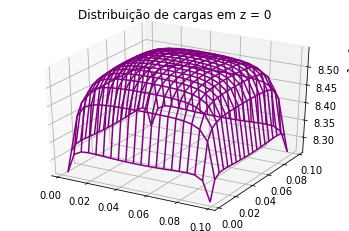

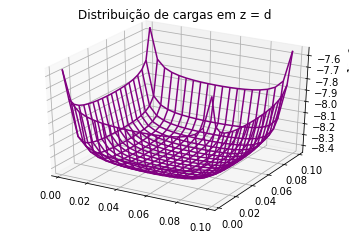

In [91]:
n = 20
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)

distribuicao_plot(matriz_c, matriz_a, n)
distribuicao_plot2(matriz_c, matriz_a, n)

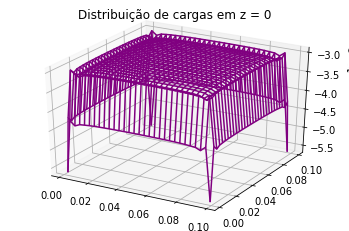

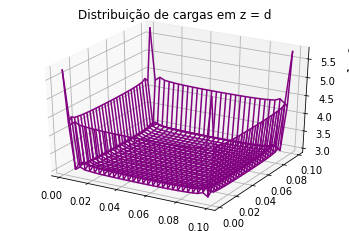

In [83]:
n = 30
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)

distribuicao_plot(matriz_c, matriz_a, n)
distribuicao_plot2(matriz_c, matriz_a, n)

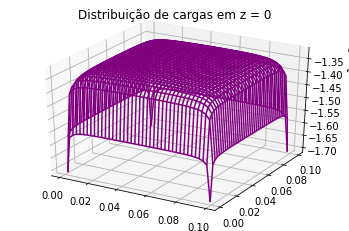

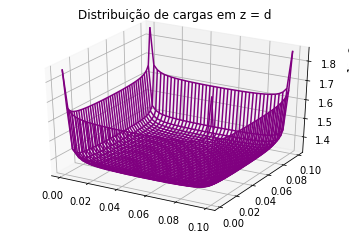

In [84]:
n = 40 
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)

distribuicao_plot(matriz_c, matriz_a, n)
distribuicao_plot2(matriz_c, matriz_a, n)

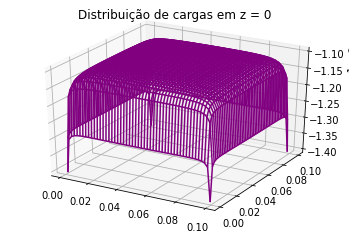

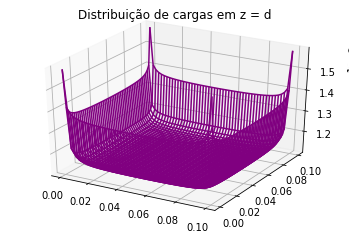

In [87]:
n = 50
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)

distribuicao_plot(matriz_c, matriz_a, n)
distribuicao_plot2(matriz_c, matriz_a, n)

# 4) Determine a expressão da Capacitância para a aproximação da carga através de N^2 funções de pulso. Varie N, observe a convergência da capacitância e compare com o valor analítico aproximado.

Sabemos que a capacitancia pode ser encontrada através de:     

 $ C = \frac{Q}{V} $, com   V sendo a diferença de potencial e Q a carga eletrica armazenada

In [108]:
def capacitancia(amplitude, n):
  return sum(amplitude[n*n:2*n*n])*delta*delta/v0


In [109]:
n = 10
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)
cap = capacitancia(matriz_a, n)
print(cap)

-7.7508468066177e-12


In [110]:
n = 20
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)
cap = capacitancia(matriz_a, n)
print(cap)

-8.278331218988976e-11


In [111]:
n = 30
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)
cap = capacitancia(matriz_a, n)
print(cap)

3.169530992869827e-10


In [112]:
n = 40
delta = l/n
matriz_c = matriz_coordenadas(n)
matriz_z = matriz_impedancia(n, matriz_c)
matriz_v = matriz_tensao(n)
matriz_a = amplitude(matriz_z, matriz_v)
cap = capacitancia(matriz_a, n)
print(cap)

1.3745121025596017e-10


In [115]:
#valor analitico esperado
val_analitico = e0*l*l/d
print(val_analitico)

8.85e-11


Analisando os valores encontrados conseguimos concluir que há convergência entre a capacitância e o valor analitico esperado